<a href="https://colab.research.google.com/github/butterfish13/DataScience/blob/master/HouseSalesCoursera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import pandas.util.testing as tm
%matplotlib inline


In [0]:
filename = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
data = pd.read_csv(filename)
print(data.head())

   Unnamed: 0          id             date  ...     long  sqft_living15  sqft_lot15
0           0  7129300520  20141013T000000  ... -122.257           1340        5650
1           1  6414100192  20141209T000000  ... -122.319           1690        7639
2           2  5631500400  20150225T000000  ... -122.233           2720        8062
3           3  2487200875  20141209T000000  ... -122.393           1360        5000
4           4  1954400510  20150218T000000  ... -122.045           1800        7503

[5 rows x 22 columns]


In [0]:
def quickEda(df):
  '''Print a preliminary EDA  of the data
  args: df - Dataframe of csv file
  return: none'''
  linebreak = '-------------------'
  #display datatypes, missing data, memory
  print(linebreak*5)
  print("datatype: ")
  print(df.info())
  #check columns name
  print(linebreak*5)
  print("Columns in dataframe: ")
  print(df.columns)
  print(linebreak*5)
  #check first 5 rows of the dataframe
  print("dataframe head")
  print(df.head())
  print(linebreak*5)
  #display stats summary of dataframe
  print(df.describe())
  print(linebreak*5)

In [0]:
quickEda(data)

-----------------------------------------------------------------------------------------------
datatype: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  

In [0]:
##drop id column and unnamed from dataframe
data.drop(columns='id', axis=1, inplace=True)
data.drop(columns='Unnamed: 0', axis=1, inplace=True)
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [0]:
def missingdata(df):
  '''display list of missing data and replace nan with average value
  args: df - dataframe
  return: list of missing data'''
  dirty_col = [x for x in df.columns if df[x].isnull().sum()]
  return dirty_col
  
print(missingdata(data))

In [0]:
##replace bedroom nan value with mean
avg = data['bedrooms'].mean()
data['bedrooms'].replace(np.nan, avg, inplace=True)


In [0]:
avg = data['bathrooms'].mean()
data['bathrooms'].replace(np.nan, avg, inplace=True)

In [0]:
print(missingdata(data))

[]


0    21450
1      163
Name: waterfront, dtype: int64


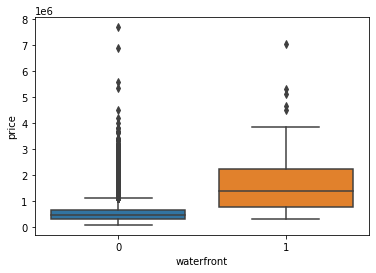

In [0]:
df = data.copy()
print(df['waterfront'].value_counts())
sns.boxplot(x='waterfront', y='price', data= df)

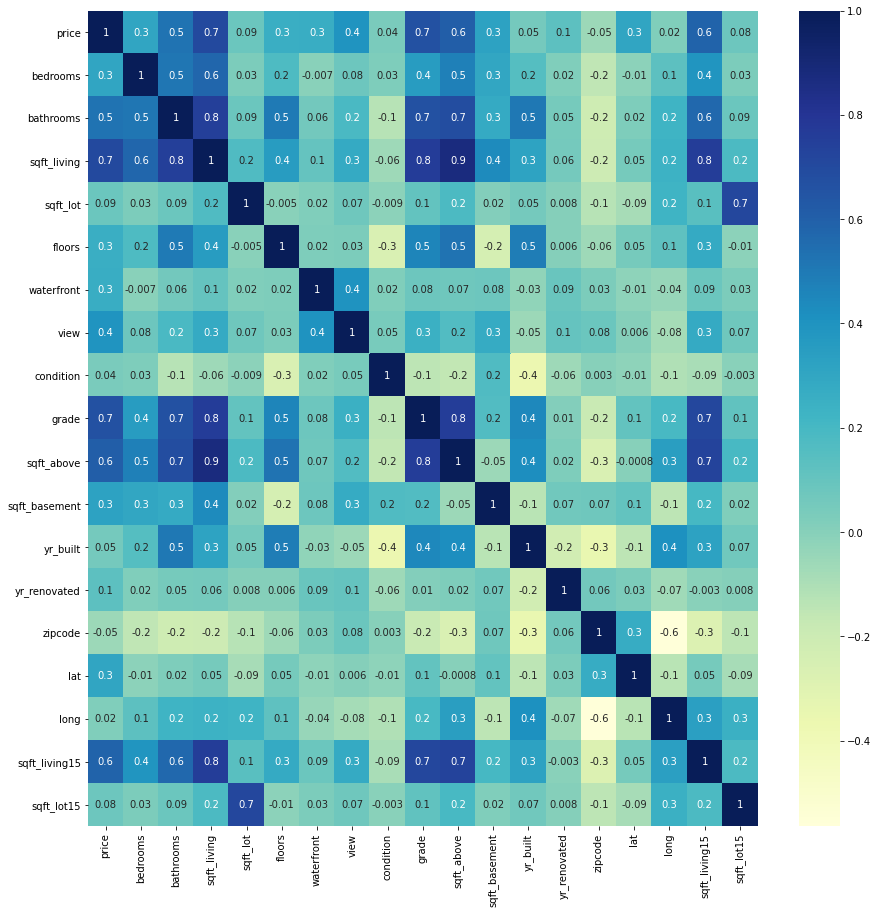

In [0]:
###features most correlated with price
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt='.1g')

In [0]:
###how price is correlated to other features
df.corr()['price'].sort_values(ascending=True)

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

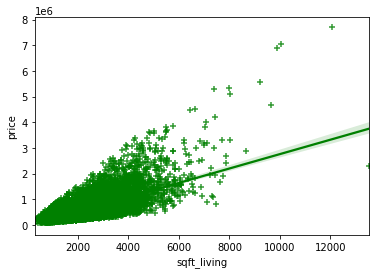

In [0]:
sns.regplot(x='sqft_living', y='price', data=df, ci= 100, color='g', marker='+')

In [0]:
###OLS to predict
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long','sqft_living15', 'sqft_lot15']

X = df[features]
Y = df['price']

reg.fit(X, Y)

print(reg.score(X, Y)

0.6998